<a href="https://colab.research.google.com/github/MEloisa/clase-git/blob/master/dogsVScats_Deep_learning_Classsification_Problem_Color_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dogs VS cats - Color Images Classification Problem, Deep Learning

In this assignment we will face an image classification problem, trying to tell apart images of dogs and images of cats. 

In [1]:
from __future__ import absolute_import

In [2]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
# Ejecuta esta celda para activar tu cuenta de Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Data processing

The images to use in this assignment are available [here](https://drive.google.com/open?id=105jGDrjEgxx2W2gYhFF8Mbf1J9qJeDPm). Download the data package and extract it into a folder in your computer.

Data is structured under two folders, *train* and *test*. You are only allowed to use the *test* data to measure the performance of your model **after** you have finished training. Both *train* and *test* folders contain one subfolder per class (*cats* and *dogs*).

The recommended way to load an image from disk is to use the *imread* function from the *scikit-image* library. For example:

In [ ]:
from skimage.io import imread

image = imread("/content/drive/My Drive/train/cats/cat.0.jpg")

This returns the image as 3-dimensional numpy matrix, containing the value of intensity of every pixel in each row, column and color channel.

In [ ]:
image.shape

(374, 500, 3)

We can visualize the loaded image using

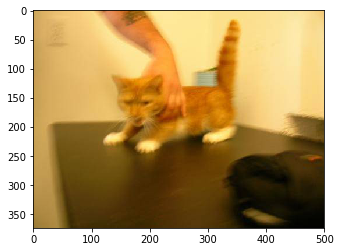

In [ ]:
plt.imshow(image)

The dataset includes 20000 training images and 5000 test images, each image at a different resolution. Loading all this data at once requires too much memory, so we will need to **resize** each image to a smaller, common size as we load them from disk. We can do so by again making use of a *scikit-image* function. For example:

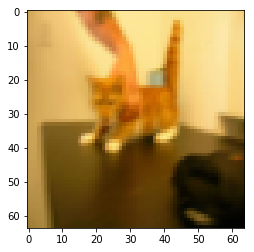

In [ ]:
from skimage.transform import resize

size = 64
smallimage = resize(image, (64, 64, 3), mode="reflect")  # 64 x 64 pixels, 3 color channels
plt.imshow(smallimage)

<img src="img/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
    
Perform the following tasks to prepare the data:
- Build a numpy array *X_train* containing one entry for each training image in the data. Each entry must contain the 3-dimensional matrix of pixels corresponding to an image. Make sure to scale down each image to a common size
- Normalize *X_train* so that pixels follow a distribution lying in the range [0, 1]
- Build a corresponding array *Y_train* with the class of each training image (0 for cats and 1 for dogs).
- Randomly shuffle the data. Make sure you shuffle both *X_train* and *Y_train* using the same permutation, so you don't lose track of the class of each training pattern.

- Repeat the whole procedure again to generate *X_test* and *Y_test* matrices for the test data.
</font>

***

<img src="img/exclamation.png" height="80" width="80" style="float: right;"/>

***
<font color=#2655ad>
    
- Take advantage of the *glob* package to generate the filename lists for the indoor and outdoor subfolders.
- Since you need to repeat the procedure both for training and test data, it would be useful to implement a function that performs all the data loading and transforming steps.

</font>

***

In [ ]:
####### INSERT YOUR CODE HERE

import pandas as pd
import numpy as np
import glob

images_list= []

def load_images(path1, path2):
    for name in glob.glob(path1):
        image = imread(name)
        smallimage = resize(image, (64, 64, 3), mode="reflect")
        images_list.append(smallimage)
    
    
    for name in glob.glob(path2):
        image = imread(name)
        smallimage = resize(image, (64, 64, 3), mode="reflect")
        images_list.append(smallimage)

    return images_list

In [ ]:
X_train = []

X_train = load_images('/content/drive/My Drive/train/cats/*.jpg','/content/drive/My Drive/train/dogs/*.jpg')
X_test = []
X_test = load_images('/content/drive/My Drive/test/cats/*.jpg','/content/drive/My Drive/test/dogs/*.jpg')

In [ ]:
Y1 = np.zeros((10000,1))
Y2 = np.ones((10000,1))
Y3 = np.zeros((2500,1))
Y4 = np.ones((2500,1))

Y_train = (np.concatenate((Y1, Y2), axis=0))
Y_test = (np.concatenate((Y3, Y4), axis=0))


If everything has been properly loaded both X_train and Y_train lists should have equal length, and the same should happen for the pair X_test and Y_test.

In [ ]:
print("X_train size", len(X_train))
print("Y_train size", len(Y_train))
print("X_test size", len(X_test))
print("Y_test size", len(Y_test))

X_train size 8429
Y_train size 20000
X_test size 8429
Y_test size 5000


## Basic deep model

<img src="img/question.png" height="80" width="80" style="float: right;"/>

***
<font color=#ad3e26>
Create a deep network that achieves at least a 70% of accuracy in the test set. Make use of the layers you seem fit for problem, but you should include at least one layer that makes use of the spatial properties of the images. You cannot use the test data for fitting the network, but you can use it to check the final performance of different network architectures, and select the architecture performing best.</font>

***

<img src="img/exclamation.png" height="80" width="80" style="float: right;"/>

***
<font color=#2655ad>
    
If you are unable to attain the required 70% of accuracy, or your accuracy is too close to 100%, review the following checklist:
- Have you mixed training and test data?
- Have the values of the pixels been normalized?
- Have you compiled the model with a loss function appropriate for **binary** classification?
- Have you used ReLU units in the hidden layers? Have you used sigmoid or softmax layers in the output layer?

***

In [ ]:
####### INSERT YOUR CODE HERE

## Improving the network

<img src="img/pro.png" height="80" width="80" style="float: right;"/>

***

<font color=#259b4c>
    
You can further improve your results by applying one or more of the following strategies:
- Keep apart a portion of the training data as a **validation set**. Then use an <a href="https://keras.io/callbacks/#earlystopping">**EarlyStopping strategy**</a> to monitor the loss of these validation data, and stop when training when after a number of iterations such loss has not decreased.
- Use **image augmentation techniques** to artifically create new training images. To do so, you can make use of <a href="https://keras.io/preprocessing/image/">ImageDataGenerator</a> in Keras.
- Make use of a pre-trained large network, building your network on top of it. You can find some examples in the [Keras Applications](https://keras.io/applications/) page. Be careful when freezing pre-trained networks that include [BatchNormalization layers](http://blog.datumbox.com/the-batch-normalization-layer-of-keras-is-broken/), such as ResNet.
- Make use of **metamodelling techniques** to select the best architecture parameters for the networks. You can use scikit-learn methods GridSearchCV or RandomSearchCV. You can do those by using the <a href="https://keras.io/scikit-learn-api/">KerasClassifier</a> wrapper. Even better, you can mix KerasClassifier with an advanced search method such as [BayesSearch](https://scikit-optimize.github.io/#skopt.BayesSearchCV), included in the [scikit-optimize](https://scikit-optimize.github.io/) library. If you get memory problems try to free GPU memory before building each network by [clearing the tensorflow session](https://stackoverflow.com/questions/50895110/what-do-i-need-k-clear-session-and-del-model-for-keras-with-tensorflow-gpu).

If you correctly use these techniques you should be able to improve your model. With some effort it is possible to up to a 90% test accuracy. Try to do your best!</font>

***

In [ ]:
####### INSERT YOUR CODE HERE

## Analyzing the results

<img src="img/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
Find and show some test images for which your model fails. Can you give an explanation for this behavior?</font>

***

In [ ]:
####### INSERT YOUR CODE HERE

<img src="img/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
Write a small report summarizing the network choices you have tried, what worked and what didn't. What have you learned from this experience?</font>

***